In [48]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [49]:
df = pd.read_csv('data/quality.csv')
df = df.sort_values(by=['tileset', 'chunk_size']).drop(columns='size')
print(df)

        tileset  chunk_size  overlap  discard     single      pair      quad  \
0   Carcassonne           4        1        0   1.085087  0.852674       NaN   
1   Carcassonne           8        1        0   0.875262  0.831444       NaN   
2   Carcassonne           8        3        2   0.870260  0.825877       NaN   
11      Circuit           8        1        0  10.969798  3.868398  1.456416   
14      Circuit           8        3        2  12.347332  4.266862  1.544217   
12      Circuit          16        1        0   9.762323  3.577201  1.367298   
15      Circuit          16        3        2  10.718101  3.728721  1.404037   
17      Circuit          16        7        4  11.426496  3.930653  1.473346   
13      Circuit          32        1        0   7.591138  2.825690  1.201037   
16      Circuit          32        3        2   7.961185  2.908807  1.205751   
18      Circuit          32        7        4   7.817238  2.863599  1.206334   
19    FloorPlan           8        1    

Text(0, 0.5, 'T-Test')

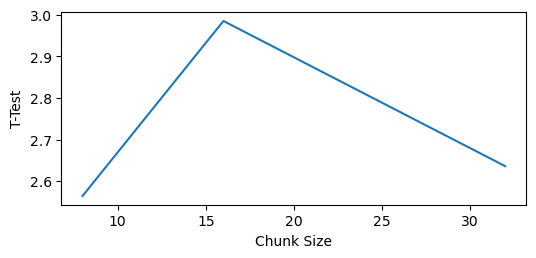

In [50]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

data = np.genfromtxt("data/quality.csv", delimiter=",", dtype=str)
x = []
y = []
for i in range(1, len(data)):
    if data[i][0] == "Summer" and data[i][3] == "1":
        x.append(float(data[i][2]))
        y.append(float(data[i][5]))
    
plt.plot(x, y)
plt.xlabel("Chunk Size")
plt.ylabel("T-Test")


In [51]:
import matplotlib.pyplot as plt
from matplotlib import cm
import math

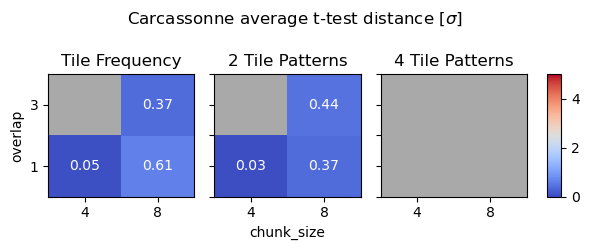

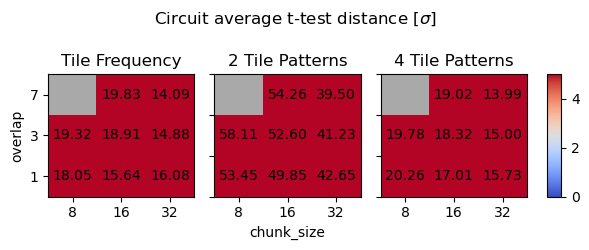

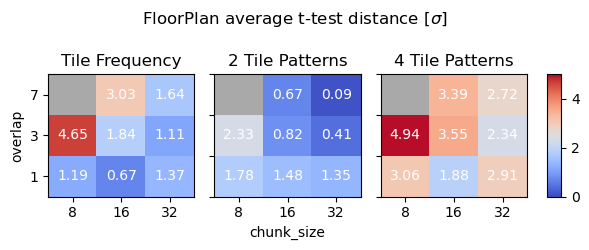

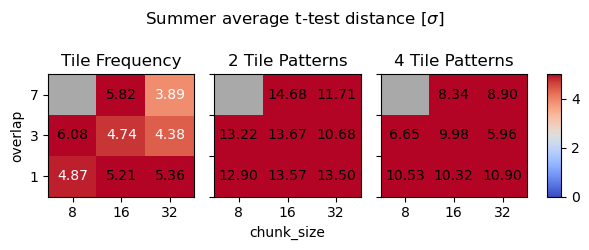

In [52]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6, 2.5]
# mpl.rcParams['figure.dpi'] = 50

for tileset in set(df['tileset']):
    X = []
    Y = []
    Z = [[],[],[]]
    
    fig, axis = plt.subplots(1,4, width_ratios=[1,1,1,0.1])
    axis[0].set_ylabel('overlap')
    axis[1].set_xlabel('chunk_size')

    axis[1].set_yticklabels([])
    axis[2].set_yticklabels([])

    fig.suptitle(f"{tileset} t-test sum [$\sigma$]")

    # subfigs = fig.subfigures(1,3 )

    for _, row in df[df['tileset'] == tileset].iterrows():
        X.append(row['chunk_size'])
        Y.append(row['overlap'])
        Z[0].append(abs(row['single_std_dev']))
        Z[1].append(abs(row['pair_std_dev']))
        Z[2].append(abs(row['quad_std_dev']))

    x_map: list = list(sorted(set(X)))
    y_map: list = list(sorted(set(Y)))
    axis[0].set_yticks([x + 0.5 for x in range(0, len(y_map))], y_map)


    for ax, Z_i, frag_type in zip(axis[:3], Z, ['single', 'pair', 'quad']):     
        ax.set_facecolor('darkgray')

        img = [[math.nan for _ in x_map] for y in y_map ]
        for x, y, z in zip(X,Y,Z_i):
            row = y_map.index(y)
            col = x_map.index(x)
            img[row][col] = z
        img = np.array(img)

        im = ax.pcolor(img, cmap=cm.coolwarm, vmin=0, vmax=5)
        # im = ax.pcolor(img, cmap=cm.viridis, vmin=1, vmax=10)
        for y in range(img.shape[0]):
            for x in range(img.shape[1]):
                if img[y, x] == img[y, x]:
                    ax.text(x + 0.5, y + 0.5, f"{ img[y, x]:0.2f}",
                            horizontalalignment='center',
                            verticalalignment='center',
                            color= 'white' if img[y,x] < 5 else 'black',
                            fontsize = 10,
                            )

        match frag_type:
            case 'single':
                title = 'Tile Frequency'
            case 'pair':
                title = '2 Tile Patterns'
            case 'quad':
                title = '4 Tile Patterns'
        ax.set_title(title)
        ax.set_xticks([x + 0.5 for x in range(0, len(x_map))], x_map)
        fig.colorbar(im, cax=axis[3], orientation='vertical')

    fig.tight_layout()
    fig.savefig(f"output/quality-std-dev-{tileset}.pdf")
    fig.savefig(f"output/quality-std-dev-{tileset}.eps")
    fig.show()






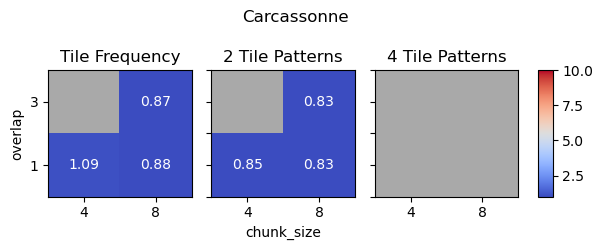

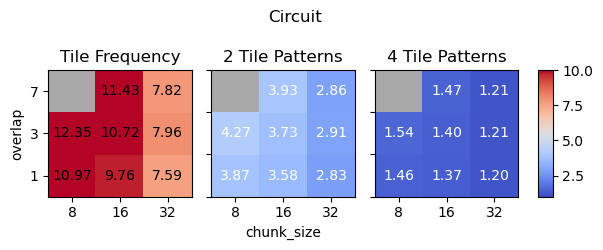

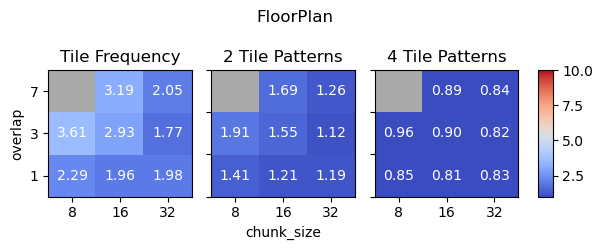

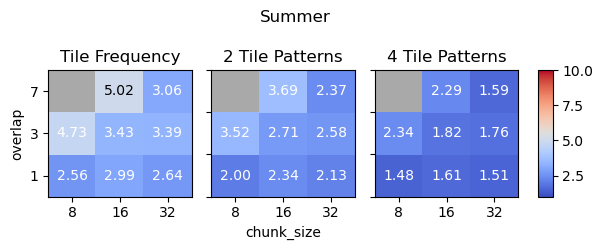

In [53]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6, 2.5]
# mpl.rcParams['figure.dpi'] = 50

for tileset in set(df['tileset']):
    X = []
    Y = []
    Z = [[],[],[]]
    
    fig, axis = plt.subplots(1,4, width_ratios=[1,1,1,0.1])
    axis[0].set_ylabel('overlap')
    axis[1].set_xlabel('chunk_size')

    axis[1].set_yticklabels([])
    axis[2].set_yticklabels([])

    fig.suptitle(f"{tileset} average t-test distance [$\sigma$]")

    # subfigs = fig.subfigures(1,3 )

    for _, row in df[df['tileset'] == tileset].iterrows():
        X.append(row['chunk_size'])
        Y.append(row['overlap'])
        Z[0].append(abs(row['single']))
        Z[1].append(abs(row['pair']))
        Z[2].append(abs(row['quad']))

    x_map: list = list(sorted(set(X)))
    y_map: list = list(sorted(set(Y)))
    axis[0].set_yticks([x + 0.5 for x in range(0, len(y_map))], y_map)


    for ax, Z_i, frag_type in zip(axis[:3], Z, ['single', 'pair', 'quad']):     
        ax.set_facecolor('darkgray')

        img = [[math.nan for _ in x_map] for y in y_map ]
        for x, y, z in zip(X,Y,Z_i):
            row = y_map.index(y)
            col = x_map.index(x)
            img[row][col] = z
        img = np.array(img)

        im = ax.pcolor(img, cmap=cm.coolwarm, vmin=1, vmax=10)
        # im = ax.pcolor(img, cmap=cm.viridis, vmin=1, vmax=10)
        for y in range(img.shape[0]):
            for x in range(img.shape[1]):
                if img[y, x] == img[y, x]:
                    ax.text(x + 0.5, y + 0.5, f"{ img[y, x]:0.2f}",
                            horizontalalignment='center',
                            verticalalignment='center',
                            color= 'white' if img[y,x] < 5 else 'black',
                            fontsize = 10,
                            )

        match frag_type:
            case 'single':
                title = 'Tile Frequency'
            case 'pair':
                title = '2 Tile Patterns'
            case 'quad':
                title = '4 Tile Patterns'
        ax.set_title(title)
        ax.set_xticks([x + 0.5 for x in range(0, len(x_map))], x_map)
        fig.colorbar(im, cax=axis[3], orientation='vertical')

    fig.tight_layout()
    fig.savefig(f"output/quality-{tileset}.pdf")
    fig.savefig(f"output/quality-{tileset}.eps")
    fig.show()




